In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import math
import statsmodels.api as sm
from statsmodels.tsa import stattools
from scipy.interpolate import spline
import seaborn as sns

In [25]:
df = pd.read_csv('2_f_1.csv', header=None, names=['value'])

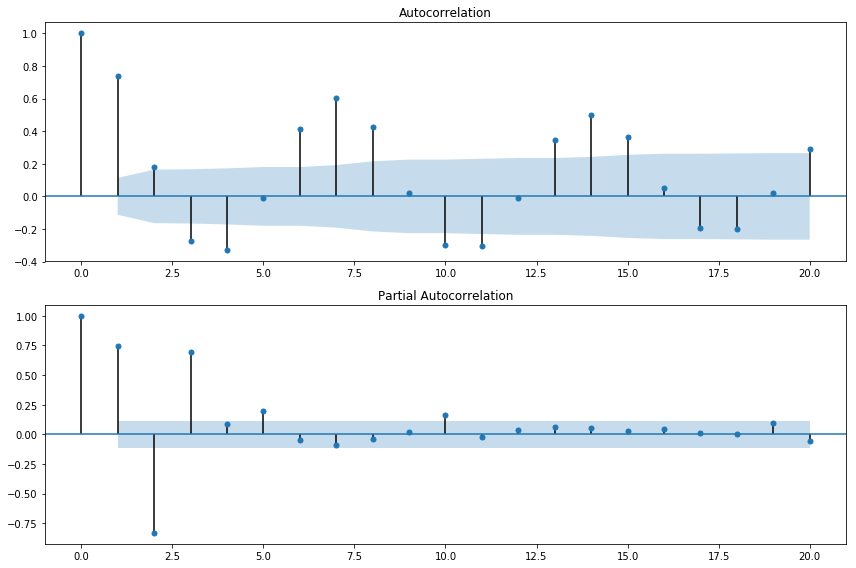

In [26]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags= 20, ax=ax1)
ax1.xaxis.set_ticks_position("bottom")
fig.tight_layout();

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags= 20, ax=ax2)
ax2.xaxis.set_ticks_position("bottom")
fig.tight_layout();

In [27]:
def tsplot (y, lags = None, title = " ",figsize = (14,8)):
    fig = plt.figure(figsize = figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))
    
    y.plot(ax = ts_ax)
    ts_ax.set_title(title)
    y.plot(ax = hist_ax, kind = "hist", bins = 25)
    hist_ax.set_title("Histogram")
    sm.graphics.tsa.plot_acf(y, lags = lags, ax = acf_ax)
    sm.graphics.tsa.plot_pacf(y, lags = lags, ax = pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

(<matplotlib.axes._subplots.AxesSubplot at 0x1772a346160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1772a81d908>)

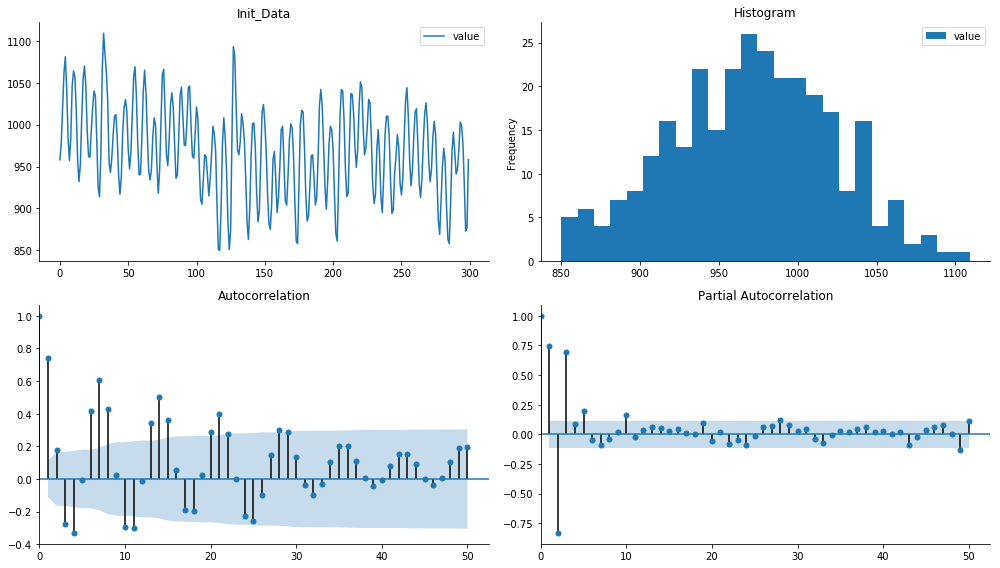

In [30]:
tsplot(df, title = "Init_Data", lags=50)

c:\users\mtx\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


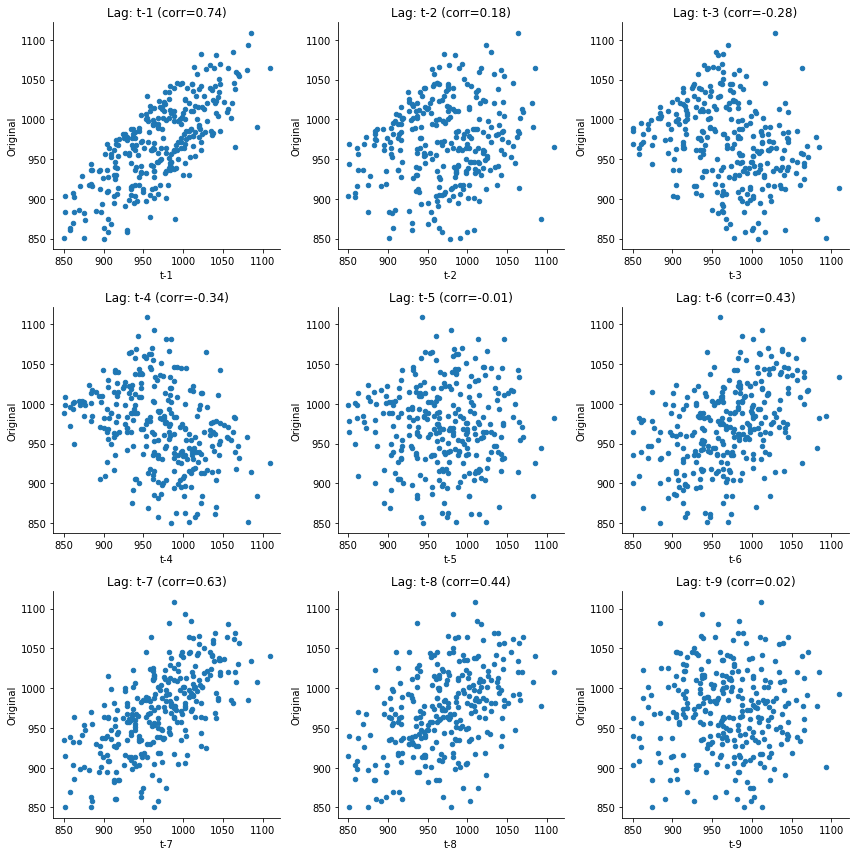

In [33]:
lags = 9
ncols = 3
nrows = int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols = ncols, nrows = nrows, figsize = (4*ncols, 4*nrows))
for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = "t-{}".format(lag)
    X = (pd.concat([df, df.shift(-lag)], axis=1,
                  keys=["y"] + [lag_str]).dropna())
    X.plot(ax = ax, kind = "scatter", y = "y", x = lag_str);
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel("Original")
    ax.set_title("Lag: {} (corr={:.2f})".format(lag_str, corr));
    ax.set_aspect("equal");
    sns.despine();
fig.tight_layout();

In [34]:
def scatter (df,lags = 9, ncols = 3):
    nrows = int(np.ceil(lags/ncols))
    fig, axes = plt.subplots(ncols = ncols, nrows = nrows, figsize = (4*ncols, 4*nrows))
    for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
        lag_str = "t-{}".format(lag)
        X = (pd.concat([df, df.shift(-lag)], axis=1,
                      keys=["y"] + [lag_str]).dropna())
        X.plot(ax = ax, kind = "scatter", y = "y", x = lag_str);
        corr = X.corr().as_matrix()[0][1]
        ax.set_ylabel("Original")
        ax.set_title("Lag: {} (corr={:.2f})".format(lag_str, corr));
        ax.set_aspect("equal");
        sns.despine();
    fig.tight_layout();

c:\users\mtx\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


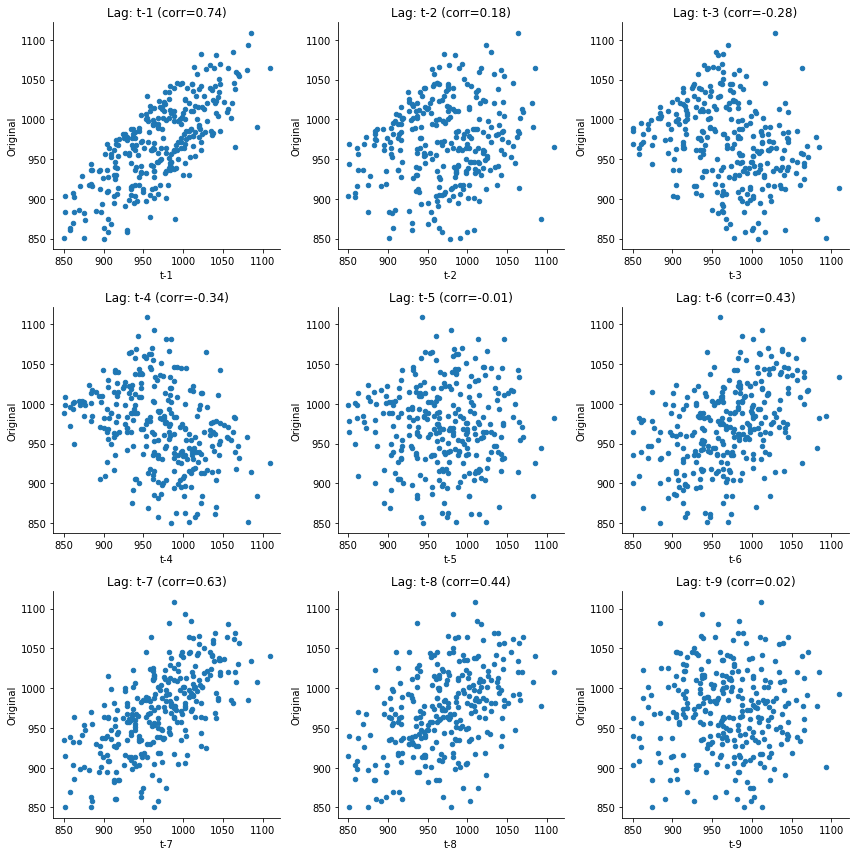

In [35]:
scatter(df)